<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Blending submissions of 3.695, 96, 97 & 98

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120

Autosaving every 120 seconds


In [2]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
import warnings

In [3]:
PATH = './'

In [4]:
!ls

'Blend with df outliers.ipynb'
'Blending submissions.ipynb'
'Combining model without outlier.ipynb'
'Elo - ML model - 3.690.ipynb'
'Elo - ML model - 3.693.ipynb'
'Elo - ML model - 3.695 beta.ipynb'
'Elo - ML model - 3.695.ipynb'
'Elo - ML model - 3.696.ipynb'
'Elo - ML model - alpha.ipynb'
'Elo - ML model - cat aggregates.ipynb'
'Elo - ML model 3.691 beta new.ipynb'
'Elo - ML model 3.691.ipynb'
'Elo - ML model clean.ipynb'
'Elo - ML model proc_df.ipynb'
'Elo - ML model-RF copy.ipynb'
'Elo - ML model-backup.ipynb'
'Elo - ML model-new.ipynb'
'Elo RF- New.ipynb'
'Elo RF.ipynb'
'Elo end 2 end.ipynb'
'Elo feature engineering - 3.691 - beta.ipynb'
'Elo feature engineering - 3.691.ipynb'
'Elo feature engineering - 3.696.ipynb'
'Elo feature engineering 3.690.ipynb'
'Elo feature engineering 3.693 .ipynb'
'Elo feature engineering 3.695 beta.ipynb'
'Elo feature engineering 3.695.ipynb'
'Elo feature engineering alpha.ipynb'
'Elo feature engineering using agg.ipynb'
'Elo feature engineering-backup.

In [9]:
files = ['xg_submission_stacked_lgb-2019-02-21 13:41:48.181414.csv',
        'xg_submission_stacked_lgb-2019-02-22 03:43:06.565696.csv',
        'dl_submission_stacked_lgb-2019-02-22 21:37:59.515079.csv',
        'comb_15.csv',
        'combined_submission-2019-02-15 15:09:20.708055.csv',
        'combined_submission-2019-02-21 13:55:21.772806.csv',
        'combined_submission-2019-02-22 03:43:50.172624.csv',
        'combined_submission-2019-02-22 20:49:55.088273.csv',
        'combined_submission-2019-02-22 21:40:05.269919.csv']

In [10]:
# files = ['submission-2019-01-16 00:35:46.490517.csv','submission-2019-01-18 01:18:08.182115.csv','submission-2019-01-20 17:01:54.207459.csv','submission-2019-01-16 00:36:26.004443.csv','submission-2019-01-18 01:42:20.587834.csv','submission-2019-01-20 17:27:46.797180.csv','submission-2019-01-16 12:20:00.957329.csv','submission-2019-01-18 01:47:04.024727.csv','submission-2019-01-20 18:29:37.773532.csv','submission-2019-01-16 21:37:16.421927.csv','submission-2019-01-18 17:22:46.188675.csv','submission-2019-01-20 19:11:58.593189.csv','submission-2019-01-17 10:20:06.724992.csv','submission-2019-01-20 01:28:12.077657.csv','submission-2019-01-20 19:35:24.892043.csv','submission-2019-01-17 11:09:17.495216.csv','submission-2019-01-20 01:46:39.187580.csv','submission-2019-01-20 20:47:32.743729.csv','submission-2019-01-17 23:23:57.743505.csv','submission-2019-01-20 02:32:16.439302.csv']

In [11]:
files = files[:15]

In [12]:
targets = []

In [13]:
for (i,c) in enumerate(files):
    targets.append(pd.read_csv(f'{PATH}{c}', names=["card_id",f'target_{i}'],skiprows=[0],header=None))

In [14]:
targets[1].head()

,card_id,target_1
0,C_ID_0ab67a22ab,-2.218586
1,C_ID_130fd0cbdd,-0.264125
2,C_ID_b709037bc5,-0.951051
3,C_ID_d27d835a9f,-0.081285
4,C_ID_2b5e3df5c2,-1.812655


In [15]:
files

['xg_submission_stacked_lgb-2019-02-21 13:41:48.181414.csv',
 'xg_submission_stacked_lgb-2019-02-22 03:43:06.565696.csv',
 'dl_submission_stacked_lgb-2019-02-22 21:37:59.515079.csv',
 'comb_15.csv',
 'combined_submission-2019-02-15 15:09:20.708055.csv',
 'combined_submission-2019-02-21 13:55:21.772806.csv',
 'combined_submission-2019-02-22 03:43:50.172624.csv',
 'combined_submission-2019-02-22 20:49:55.088273.csv',
 'combined_submission-2019-02-22 21:40:05.269919.csv']

In [16]:
files[-1:]

['combined_submission-2019-02-22 21:40:05.269919.csv']

In [17]:
targets[-1]

,card_id,target_8
0,C_ID_0ab67a22ab,-2.415547
1,C_ID_130fd0cbdd,-0.338663
2,C_ID_b709037bc5,-0.859591
3,C_ID_d27d835a9f,-0.087357
4,C_ID_2b5e3df5c2,-1.452571
5,C_ID_5814b4f13c,0.539699
6,C_ID_a1b3c75277,0.190906
7,C_ID_f7cada36d3,0.683681
8,C_ID_9d2bc8dfc4,-0.674536
9,C_ID_6d8dba8475,-0.876022


In [18]:
pd.read_csv(f'combined_submission-2019-02-22 20:49:55.088273.csv', names=["card_id",f'target_1'],skiprows=[0],header=None)

,card_id,target_1
0,C_ID_0ab67a22ab,-2.302681
1,C_ID_130fd0cbdd,-0.314882
2,C_ID_b709037bc5,-0.838809
3,C_ID_d27d835a9f,-0.090521
4,C_ID_2b5e3df5c2,-1.417952
5,C_ID_5814b4f13c,0.475726
6,C_ID_a1b3c75277,0.169665
7,C_ID_f7cada36d3,0.730075
8,C_ID_9d2bc8dfc4,-0.668461
9,C_ID_6d8dba8475,-0.813750


In [19]:
df_base = targets[-1]

In [20]:
df_base.head()

,card_id,target_8
0,C_ID_0ab67a22ab,-2.415547
1,C_ID_130fd0cbdd,-0.338663
2,C_ID_b709037bc5,-0.859591
3,C_ID_d27d835a9f,-0.087357
4,C_ID_2b5e3df5c2,-1.452571


In [21]:
files[:14]

['xg_submission_stacked_lgb-2019-02-21 13:41:48.181414.csv',
 'xg_submission_stacked_lgb-2019-02-22 03:43:06.565696.csv',
 'dl_submission_stacked_lgb-2019-02-22 21:37:59.515079.csv',
 'comb_15.csv',
 'combined_submission-2019-02-15 15:09:20.708055.csv',
 'combined_submission-2019-02-21 13:55:21.772806.csv',
 'combined_submission-2019-02-22 03:43:50.172624.csv',
 'combined_submission-2019-02-22 20:49:55.088273.csv',
 'combined_submission-2019-02-22 21:40:05.269919.csv']

In [22]:
for t in targets[:14]:
    df_base = pd.merge(df_base, t, how='inner', on='card_id')

In [23]:
df_base.head()

,card_id,target_8_x,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8_y
0,C_ID_0ab67a22ab,-2.415547,-2.147446,-2.218586,-2.328769,-2.502326,-2.919657,-2.324886,-2.360456,-2.302681,-2.415547
1,C_ID_130fd0cbdd,-0.338663,-0.292596,-0.264125,-0.310020,-0.367306,-0.305315,-0.329951,-0.315715,-0.314882,-0.338663
2,C_ID_b709037bc5,-0.859591,-0.912420,-0.951051,-0.918874,-0.800308,-0.881368,-0.856364,-0.875680,-0.838809,-0.859591
3,C_ID_d27d835a9f,-0.087357,-0.077765,-0.081285,-0.065844,-0.108871,-0.122295,-0.093318,-0.095078,-0.090521,-0.087357
4,C_ID_2b5e3df5c2,-1.452571,-1.832296,-1.812655,-1.845287,-1.059855,-1.386392,-1.446076,-1.436255,-1.417952,-1.452571


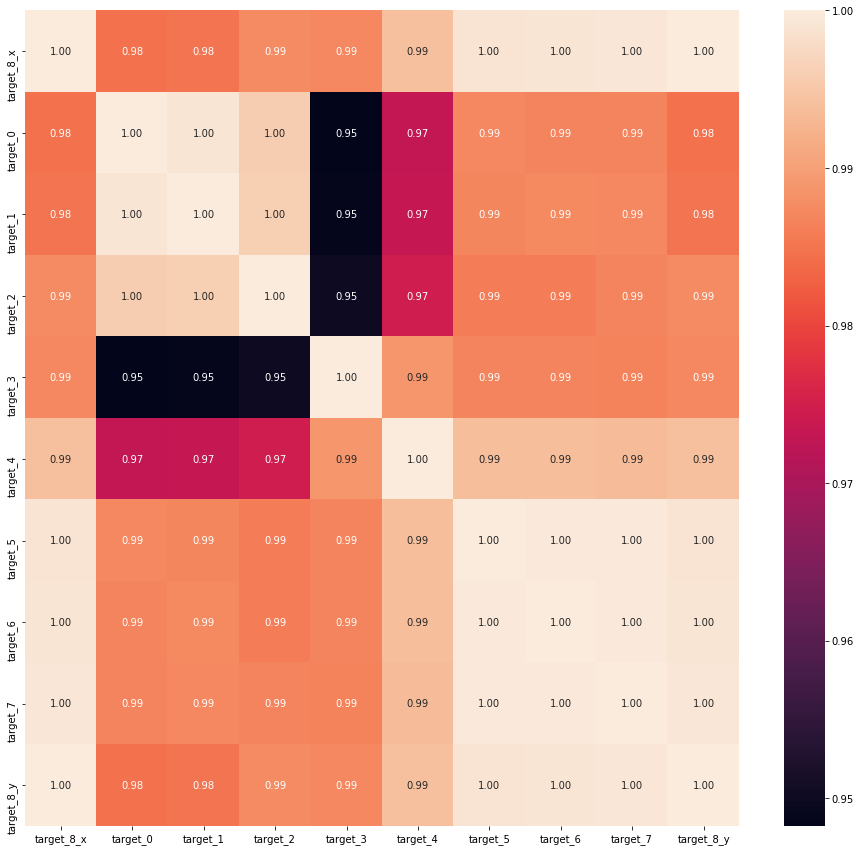

In [24]:
plt.figure(figsize=(16,15))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [25]:
M = np.zeros([df_base.iloc[:,1:].shape[1],df_base.iloc[:,1:].shape[1]])
for i in np.arange(M.shape[1]):
    for j in np.arange(M.shape[1]):
        M[i,j] = np.sqrt(metrics.mean_squared_error(df_base.iloc[:,i+1], df_base.iloc[:,j+1]))


In [26]:
M

array([[0.     , 0.22117, 0.21841, 0.19874, 0.19874, 0.13463, 0.05617, 0.05461, 0.04762, 0.     ],
       [0.22117, 0.     , 0.05208, 0.11234, 0.40523, 0.29183, 0.20261, 0.20698, 0.20549, 0.22117],
       [0.21841, 0.05208, 0.     , 0.10921, 0.40308, 0.2896 , 0.20382, 0.20154, 0.20315, 0.21841],
       [0.19874, 0.11234, 0.10921, 0.     , 0.39748, 0.28257, 0.21037, 0.21057, 0.20541, 0.19874],
       [0.19874, 0.40523, 0.40308, 0.39748, 0.     , 0.18816, 0.20261, 0.20154, 0.20332, 0.19874],
       [0.13463, 0.29183, 0.2896 , 0.28257, 0.18816, 0.     , 0.13868, 0.1379 , 0.13944, 0.13463],
       [0.05617, 0.20261, 0.20382, 0.21037, 0.20261, 0.13868, 0.     , 0.02604, 0.027  , 0.05617],
       [0.05461, 0.20698, 0.20154, 0.21057, 0.20154, 0.1379 , 0.02604, 0.     , 0.02617, 0.05461],
       [0.04762, 0.20549, 0.20315, 0.20541, 0.20332, 0.13944, 0.027  , 0.02617, 0.     , 0.04762],
       [0.     , 0.22117, 0.21841, 0.19874, 0.19874, 0.13463, 0.05617, 0.05461, 0.04762, 0.     ]])

In [28]:
df_base['target'] = df_base.iloc[:,1:].mean(axis=1)
df_base[['card_id','target']].to_csv("blend_top8_22feb.csv",index=False)

In [29]:
!ls

'Blend with df outliers.ipynb'
'Blending submissions.ipynb'
'Combining model without outlier.ipynb'
'Elo - ML model - 3.690.ipynb'
'Elo - ML model - 3.693.ipynb'
'Elo - ML model - 3.695 beta.ipynb'
'Elo - ML model - 3.695.ipynb'
'Elo - ML model - 3.696.ipynb'
'Elo - ML model - alpha.ipynb'
'Elo - ML model - cat aggregates.ipynb'
'Elo - ML model 3.691 beta new.ipynb'
'Elo - ML model 3.691.ipynb'
'Elo - ML model clean.ipynb'
'Elo - ML model proc_df.ipynb'
'Elo - ML model-RF copy.ipynb'
'Elo - ML model-backup.ipynb'
'Elo - ML model-new.ipynb'
'Elo RF- New.ipynb'
'Elo RF.ipynb'
'Elo end 2 end.ipynb'
'Elo feature engineering - 3.691 - beta.ipynb'
'Elo feature engineering - 3.691.ipynb'
'Elo feature engineering - 3.696.ipynb'
'Elo feature engineering 3.690.ipynb'
'Elo feature engineering 3.693 .ipynb'
'Elo feature engineering 3.695 beta.ipynb'
'Elo feature engineering 3.695.ipynb'
'Elo feature engineering alpha.ipynb'
'Elo feature engineering using agg.ipynb'
'Elo feature engineering-backup.

In [30]:
FileLink('./blend_top8_22feb.csv')

/home/chandrasekhar/private/kaggle/blend_top8_22feb.csv

- chandu_mean1.csv - 3.694 on LB
- blend_top8_20feb.csv - 3.687 on LB, best 3.686

In [32]:
!kaggle competitions submit elo-merchant-category-recommendation -f 'blend_top8_22feb.csv' -m "blending to 8 submissions"

100%|#######################################| 4.23M/4.23M [00:06<00:00, 661kB/s]
Could not find competition - please verify that you entered the correct competition ID and that the competition is still accepting submissions.
